## 3. Machine Learning for Classification
 we'll use logistic regression to predict churn 
    
### 3.1 Churn prediction project 

###  3.2 Data preparation
Download the data, read it with pandas 
Look at the data
Make column names and values look uniform 
Check if the churn variable needs any preparation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("C:/Users/justine.o_kobo360/Desktop/ML ZoomCamp Tutorials/Python Scripts/Churn_data.zip")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
list(data.dtypes[data.dtypes == 'object'].index)

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [6]:
data.columns = (data.columns
                .str.lower()
                .str.replace(" ", "_")
               )   
categorical_columns = list(data.dtypes[data.dtypes == 'object'].index)

for c in categorical_columns:
    data[c] = data[c].str.lower().str.replace(" ", "_")

In [7]:
data.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [8]:
data.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [9]:
data.totalcharges = pd.to_numeric(data.totalcharges, errors='coerce')

In [10]:
data.totalcharges.isna().sum()

11

In [11]:
data.totalcharges = data.totalcharges.fillna(0)

In [12]:
data.churn = (data.churn == 'yes').astype(int)

### 3.3 Setting up the Validation framework
perform the train/validation/test split with scikit-learn

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)

In [15]:
(len(df_full_train), len(df_test))

(5634, 1409)

In [16]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [17]:
(len(df_train), len(df_val), len(df_test))

(4225, 1409, 1409)

In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [20]:
del df_train["churn"]
del df_val["churn"]
del df_test["churn"]

## 3.4 EDA 
Check missing values
Look at the target variables(churn)
Look at numerical and categorical variables


In [21]:
df_full_train = df_full_train.reset_index(drop=True)

In [22]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [23]:
# Churn rate
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [24]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 6)

0.269968

In [25]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [26]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [27]:
list(df_full_train.columns)

['customerid',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'monthlycharges',
 'totalcharges',
 'churn']

In [28]:
categorical = [
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 ]

In [29]:
df_full_train.loc[:, categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature Importance: Churn rate and risk ratio

Feature importance analysis (part of EDA) - identifying which features affect our target variable

Churn rate

Risk ratio

Matual information -later

#### Churn rate

In [30]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [31]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [32]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [33]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [34]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [35]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [36]:
global_churn - churn_male

0.006754520462819769

In [37]:
global_churn - churn_partner

0.06493474245795922

In [38]:
global_churn - churn_no_partner

-0.05984095297455855

### Risk ratio

In [39]:
churn_no_partner / global_churn

1.2216593879412643

In [40]:
churn_partner / global_churn

0.7594724924338315

  SELECT 
      gender, 
      AVG(churn),
      AVG(churn) - global_churn as diff,
      AVG(churn) / global_churn as risk
  FROM
      data
  GROUP BY
       gender;

In [41]:
from IPython.display import display

In [42]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## 3.6 Feature importance: Mutual information
Mutual imformation- concept from the information theory. it tells us how much we can learn about one variable if we know the values of another

https://en.wikipedia.org/wiki/Mutual_information

In [43]:
from sklearn.metrics import mutual_info_score

In [44]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [45]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [46]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [47]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [48]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 3.7 Feature importance: Correlation
How about numerical columns?
 
   Correlation coefficient- http://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [49]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [50]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [51]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

In [52]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [53]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [54]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

## 3.8 One-hot encoding

Use scikit-learn to encode categorical features

In [55]:
from sklearn.feature_extraction import DictVectorizer

In [56]:
trian_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [57]:
dv = DictVectorizer(sparse=False)

In [58]:
X_train = dv.fit_transform(trian_dicts)

In [59]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [60]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [63]:
X_val = dv.transform(val_dicts)

## 3.9 Logistic regression

 Binary classification

Linear vs logistic regression

In [64]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [68]:
z = np.linspace(-7, 7, 51)

In [69]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

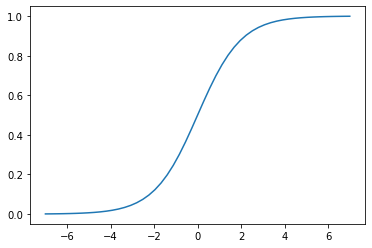

In [70]:
plt.plot(z, sigmoid(z))

In [71]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [73]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    return sigmoid(score)
    return result

### 3.10 Training logistic regression with Scikit-Learn

Train a model with Scikit-Learn

Apply it to the validation dataset

Calculate the accuracy

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [81]:
model.intercept_[0]

-0.10903422354920642

In [78]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [82]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

In [99]:
y_pred = model.predict_proba(X_val)[:, 1]

In [100]:
y_pred

array([0.00899645, 0.20452381, 0.21222324, ..., 0.13638763, 0.79976885,
       0.83740638])

In [102]:
churn_decision = (y_pred >= 0.5)

In [103]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [105]:
(y_val == churn_decision).mean()

0.8034066713981547

In [107]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [108]:
df_pred = pd.DataFrame()
df_pred["probability"] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [110]:
df_pred.head()

,probability,prediction,actual
0,0.008996,0,0
1,0.204524,0,0
2,0.212223,0,0
3,0.543045,1,1
4,0.213785,0,0


In [111]:
df_pred['correct'] = df_pred['prediction'] == df_pred['actual']

In [113]:
df_pred.correct.value_counts()

True     1132
False     277
Name: correct, dtype: int64

### 3.11 Model interpretation

Look at the coefficients

Train a smaller model with fewer features


In [116]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [115]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [118]:
dict(zip(dv.get_feature_names(),model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [119]:
small = ['contract', 'tenure', 'monthlycharges']

In [122]:
df_train[small].loc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 99.9}]

In [125]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [126]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [127]:
dv_small.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [129]:
X_train_small = dv_small.transform(dicts_train_small)

In [130]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [135]:
w0 = model_small.intercept_[0]
w0

-2.476775660845914

In [133]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [137]:
dict(zip(dv_small.get_feature_names(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [138]:
-2.47 + 0.97 + 60 * 0.027 + 1 * (-0.036)

0.08399999999999966

In [139]:
sigmoid(_)

0.5209876607065322

### 3.12 Using the model

In [140]:
dicts_full_train = (df_full_train[numerical + categorical].to_dict(orient='records'))

In [141]:
dicts_full_train[:3]

[{'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35,
  'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check'},
 {'tenure': 42,
  'monthlycharges': 73.9,
  'totalcharges': 3160.55,
  'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessb

In [143]:
dv = DictVectorizer(sparse=False)

In [144]:
X_full_train = dv.fit_transform(dicts_full_train)

In [146]:
y_full_train = df_full_train.churn.values

In [147]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [148]:
dicts_test = (df_test[numerical + categorical].to_dict(orient='records'))

In [152]:
X_test = dv.transform(dicts_test)

In [151]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [155]:
y_pred = model.predict_proba(X_test)[:, 1]

In [156]:
y_pred

array([0.06224296, 0.17473875, 0.37026701, ..., 0.00638005, 0.16576097,
       0.59688521])

In [157]:
churn_decision = (y_pred >= 0.5)

In [159]:
(churn_decision == y_test).mean()

0.815471965933286

In [160]:
customer = dicts_test[10]
customer

In [161]:
X_small = dv.transform([customer])

In [162]:
X_small.shape

(1, 45)

In [164]:
model.predict_proba(X_small)[0,1]

0.405681097796793

In [165]:
y_test[10]

0

## 3.12 Summary

•	Feature importance – risk, mutual information, correlation

•	One-hot encoding can be implemented with DictVectorizer

•	Output of log reg – probability

•	Interpretation of weights is similar to linear regression



## 3.14 Explore more

More things

•	Try to exclude least useful features
Use scikit-learn in project of last week

•	Re-implement train/val/test split using scikit-learn in the project from the last week

•	Also, instead of our linear regression, use LinearRegression (not regularized) and RidgeRegression (regularized).  Find the best regularization parameter of Ridge

Other projects 

•	Lead scoring –  https://www.kaggle.com/ashydv/leads-dataset
•	Default prediction – https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients


In [1]:
!pip install pandas-profiling


  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
